As It is confirmed that the data is clean, the next step is to train the model. and we already tried with Label Encoder which is not working well. so we will try with Frequency Encoder. as gave better result.

# ML Model Building

## Data Loading and Cleaning


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import preprocessing_d
importlib.reload(preprocessing_d)
import preprocessing_d



In [25]:
bikes=pd.read_csv("bikes.csv")
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [26]:
bikes1=preprocessing_d.BikePreprocess(bikes)
bikes1.preprocess_dataset()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [27]:
bikes=preprocessing_d.BikePreprocess(bikes).preprocess_dataset()

In [28]:
bikes.shape

(7857, 10)

In [29]:
df = bikes[(bikes['price'] < 500000) & (bikes['kms_driven'] < 200000)]
df.shape

(7667, 10)

In [30]:
# Filter bikes where its index is NOT in df.index
filtered_bikes = bikes[~bikes.index.isin(df.index)]
filtered_bikes.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
393,Bajaj Avenger Street 150 2016,2016,16470.0,1,Pune,50.0,14.0,550000,Bajaj,150.000000
483,Harley-Davidson Street Bob 2013,2013,60000.0,2,Chandigarh,18.0,65.0,545000,Harley-Davidson,792.982301
1020,Hero Hf Dawn 100Cc 2003,2003,1000000.0,1,Ahmednagar,83.0,7.7,23500,Hero,100.000000
1251,Kawasaki Z1000 2019,2019,10500.0,1,Delhi,15.0,139.0,760000,Kawasaki,485.526316
1371,Honda Cbr 150R 150Cc 2014,2014,550000.0,2,Nagpur,38.0,18.0,50000,Honda,150.000000


In [31]:
from preprocessing_d import ML_scale_tranfsormed
filtered_bikes_trans=ML_scale_tranfsormed(filtered_bikes).transform_data_freq()

In [32]:
filtered_bikes_trans["model_name"].value_counts()

model_name
1     92
2     38
3     23
6     10
4      7
5      5
21     3
7      2
13     2
11     2
15     2
25     1
57     1
68     1
9      1
Name: count, dtype: int64

In [33]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [34]:
location_encoder_freq=bikes['location'].value_counts()
model_name_encoder_freq=bikes['model_name'].value_counts()
brand_encoder_freq=bikes['brand'].value_counts()

In [35]:
categorical_cols = ['model_name', 'location', 'brand']
numerical_cols_x= ["kms_driven", "mileage", "power", "cc"]
y_col = "price"

In [36]:
categorical_encoders_freq={'model_name':model_name_encoder_freq, 'location':location_encoder_freq, 'brand':brand_encoder_freq}

In [37]:
import pickle
pickle.dump(categorical_encoders_freq, open("categorical_encoders_freq.pkl", "wb"))

In [38]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [39]:
from preprocessing_d import ML_scale_tranfsormed
ML_scale_tranfsormed(bikes).transform_data_freq()


,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,337,35.0,19.0,63500,2105,220.0
1,69,2016,50000.0,1,337,35.0,19.0,115000,1750,350.0
2,7,2012,14795.0,1,337,30.0,28.0,300000,54,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2105,400.0
4,8,2020,2000.0,1,783,30.0,30.0,197500,46,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,10,2011,7000.0,1,24,42.0,16.0,55000,748,150.0
7853,2,2015,80.0,1,1438,80.0,7.7,28000,2105,100.0
7854,19,2016,6407.0,1,783,65.0,17.0,61740,2105,180.0
7855,52,2016,7524.0,1,783,57.0,11.0,49000,2105,150.0


In [40]:
# Transforming Price column with log as Data is Highly Right skewed
#bikes['price'] = np.log1p(bikes['price'])

In [41]:
for i in categorical_cols:
    bikes[i]=bikes[i].map(categorical_encoders_freq[i])
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,337,35.0,19.0,63500,2105,220.0
1,69,2016,50000.0,1,337,35.0,19.0,115000,1750,350.0
2,7,2012,14795.0,1,337,30.0,28.0,300000,54,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2105,400.0
4,8,2020,2000.0,1,783,30.0,30.0,197500,46,330.0


In [ ]:
bikes.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
brand         0
cc            0
dtype: int64

<Axes: >

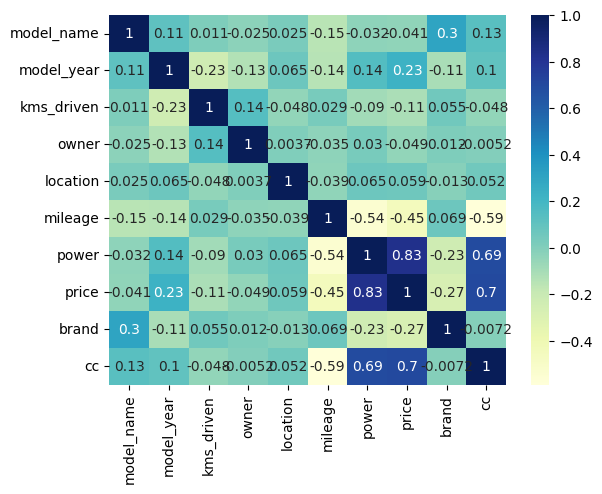

In [ ]:
import seaborn as sns
sns.heatmap(bikes.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes.drop("price", axis=1)
y=bikes["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 9145298877.259008
R-squared: 0.5705676940284206


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 85637.72237961572
R-squared: 0.6556286394447777


In [ ]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred) 
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 85576.54906602595
R-squared: 0.6561204510558669


In [ ]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


RMSE: 84002.8281
R2 Score: 0.6687


Wihtout Scaling not getting Optimal Results Now We will try with scaled data

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler_x2 = RobustScaler()
scaler_x2.fit(X_train[numerical_cols_x])
X_train[numerical_cols_x] = scaler_x2.transform(X_train[numerical_cols_x])
X_test[numerical_cols_x] = scaler_x2.transform(X_test[numerical_cols_x])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 85604.82044731254
R-squared: 0.6558932029174361


In [ ]:
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


RMSE: 84002.8281
R2 Score: 0.6687


In [ ]:
X_train

,model_name,model_year,kms_driven,owner,location,mileage,power,brand,cc
6162,13,2015,-0.087725,1,40,-0.400000,0.8,1750,1.581564
432,5,2012,-0.441517,1,783,0.900000,-0.6,748,-0.168436
7192,54,2017,-0.194810,1,291,-0.250000,0.5,128,0.313882
3026,3,2003,2.287516,3,783,-0.500000,0.0,1750,0.831564
3518,15,2019,-0.323345,1,1438,0.577204,-0.3,567,-0.118436
...,...,...,...,...,...,...,...,...,...
5226,78,2017,0.520164,1,1438,-0.250000,0.0,1750,0.831564
5390,5,2019,-0.123474,1,164,-0.437069,1.0,491,0.331564
860,21,2018,-0.047156,1,1438,-0.250000,0.6,491,0.081564
7603,1,2006,-0.441035,1,1438,1.500000,-0.6,2105,-0.168436


In [ ]:
# Full pipeline for cleaning, preprocessing, and training a tree-based model on your dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error
from xgboost import XGBRegressor

# ===== 1. Load Data =====
df = pd.read_csv("bikes_EDA_Cleaned.csv")

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

# Drop missing values in important columns
df = df.dropna(subset=['location', 'price'])

# ===== 2. Handle Outliers =====
# Keep only reasonable ranges (adjust thresholds based on domain knowledge)
df = df[(df['price'] < 500000) & (df['kms_driven'] < 200000)]

# ===== 3. Encode Categorical Features =====
# Frequency encoding for high-cardinality columns
df['location_freq'] = df['location'].map(df['location'].value_counts())
df['model_name_freq'] = df['model_name'].map(df['model_name'].value_counts())
df['brand_freq'] = df['brand'].map(df['brand'].value_counts())

# Drop original high-cardinality text columns
df = df.drop(columns=['model_name', 'location', 'brand'])

# ===== 4. Prepare Features and Target =====
X = df.drop(columns=['price'])
y = df['price']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== 5. Train Tree-Based Model (XGBoost) =====
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


RMSE: 19348.1328
R2 Score: 0.9268


In [ ]:
X_test_scaled

array([[ 1.        , -0.33111254,  0.        , ...,  0.64409031,
        -0.33333333, -0.20326797],
       [-0.5       ,  0.7525285 ,  0.        , ...,  1.44621514,
         0.73333333, -0.18431373],
       [-1.        ,  0.39131482,  0.        , ..., -0.4063745 ,
         0.2       ,  0.84575163],
       ...,
       [-1.        ,  0.59198908,  1.        , ...,  0.01992032,
         0.53333333,  0.61568627],
       [ 0.5       , -0.44918928,  0.        , ..., -0.36520584,
        -0.13333333, -0.03921569],
       [ 0.75      , -0.28852946,  0.        , ..., -0.25232404,
        -0.06666667, -0.20326797]], shape=(1530, 9))